# Grey wolf optimization

Grey wolf optimizer (GWO) is a population-based meta-heuristics algorithm that simulates the leadership hierarchy and hunting mechanism of grey wolves in nature, and it’s proposed by Seyedali Mirjalili et al. in 2014.  

Grey wolves are considered apex predators, which are at the top of the food chain
Grey wolves prefer to live in groups (packs), each group contain 5-12 individuals on average.
All the individuals in the group have a very strict social dominance hierarchy as demonstrated in the accompanying figure.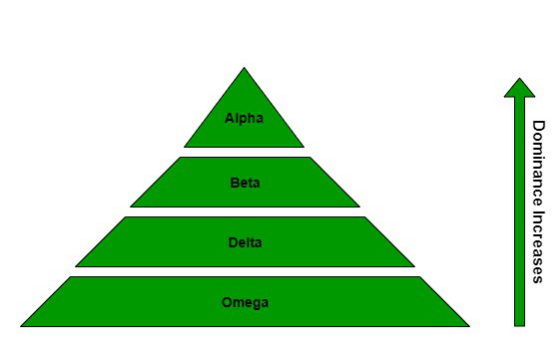

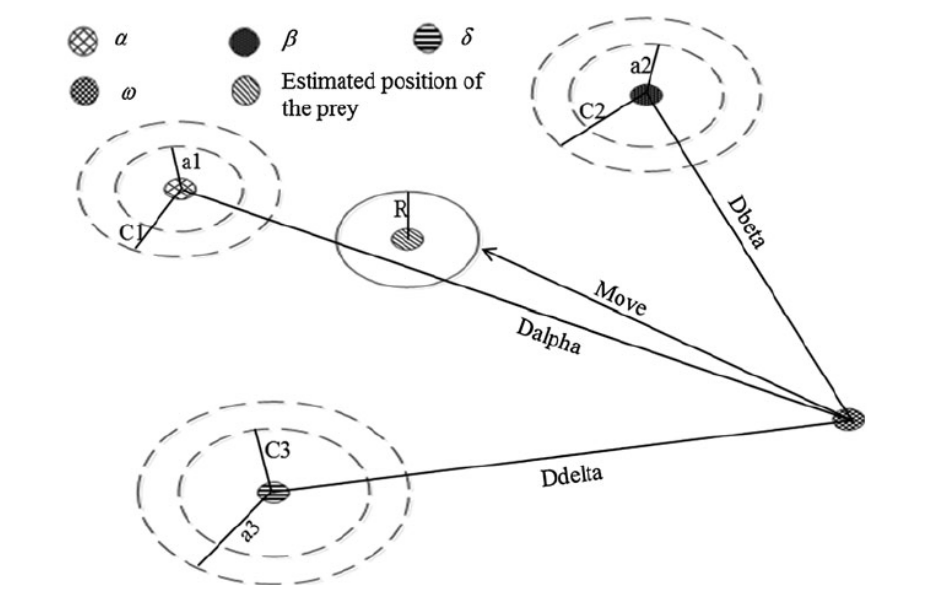

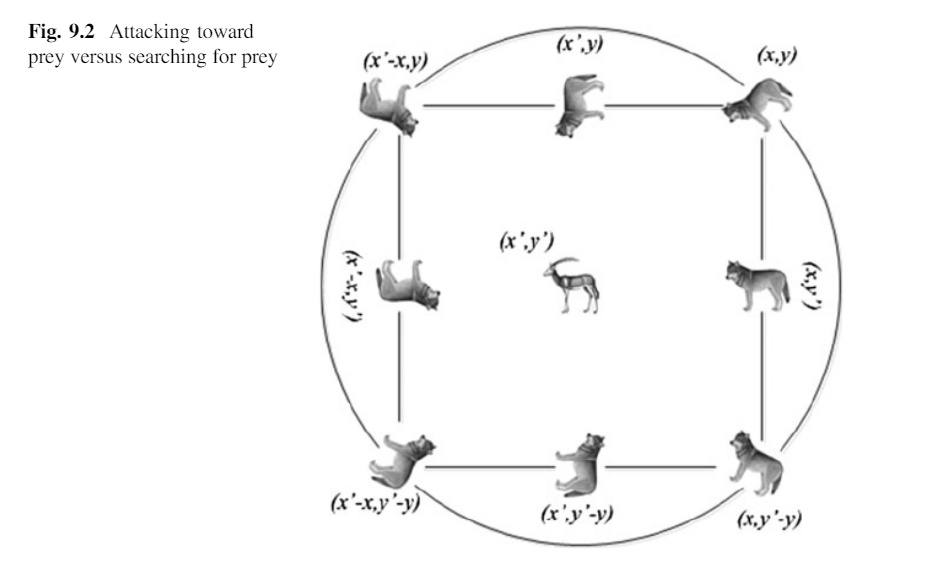

## Pseudocode

1. Define the optimization problem:
    - Define the objective function f(x) to be minimized or maximized.
    - Set the bounds for the decision variables.

2. Initialize parameters:
    - Number of wolves (N), number of iterations (Max_Iter).
    - Initialize alpha, beta, and delta wolves' positions as the best, second best, and third best.

3. Initialize population:
    - Generate initial positions of wolves randomly within the bounds.

4. Evaluate fitness:
    - Calculate the fitness of each wolf using f(x).
    - Identify alpha (best), beta (second best), and delta (third best) wolves based on fitness.

5. Iterate until stopping criteria are met:
  For t = 1 to Max_Iter:
      For each wolf in the population:
          Update the position of the wolf using the alpha, beta, and delta positions:
                - Compute coefficients A and C using random values and adaptively decreasing factor a.
                - Calculate the influence of alpha, beta, and delta wolves.
                - Update the wolf's position based on these influences.

        - Recalculate fitness of wolves and update alpha, beta, and delta positions.

6. Output:
    - The alpha wolf's position as the best solution.


In [2]:
import numpy as np

def gwo(objective_function, dim, bounds, num_wolves=10, max_iter=100):
    # Initialize parameters
    lb, ub = bounds
    wolves = np.random.uniform(lb, ub, (num_wolves, dim))
    alpha, beta, delta = np.zeros(dim), np.zeros(dim), np.zeros(dim)
    alpha_score, beta_score, delta_score = float("inf"), float("inf"), float("inf")

    # Main optimization loop
    for iteration in range(max_iter):
        # Evaluate fitness of all wolves
        for wolf in wolves:
            fitness = objective_function(wolf)
            if fitness < alpha_score:
                alpha_score, alpha = fitness, wolf.copy()
            elif fitness < beta_score:
                beta_score, beta = fitness, wolf.copy()
            elif fitness < delta_score:
                delta_score, delta = fitness, wolf.copy()

        # Update positions of wolves
        a = 2 - iteration * (2 / max_iter)  # Decreasing factor
        for i, wolf in enumerate(wolves):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            A1, C1 = 2 * a * r1 - a, 2 * r2
            D_alpha = abs(C1 * alpha - wolf)
            X1 = alpha - A1 * D_alpha

            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            A2, C2 = 2 * a * r1 - a, 2 * r2
            D_beta = abs(C2 * beta - wolf)
            X2 = beta - A2 * D_beta

            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            A3, C3 = 2 * a * r1 - a, 2 * r2
            D_delta = abs(C3 * delta - wolf)
            X3 = delta - A3 * D_delta

            # Update position
            wolves[i] = np.clip((X1 + X2 + X3) / 3, lb, ub)

    # Return the best solution
    return alpha, alpha_score

# Objective function (example: sphere function)
def sphere_function(x):
    return sum(x**2)

# Usage example
dim = 5
bounds = (-10, 10)
best_position, best_score = gwo(sphere_function, dim, bounds)
print("C NEHA-1BM22CS074")
print(f"Best Position: {best_position}, Best Score: {best_score}")


C NEHA-1BM22CS074
Best Position: [-6.60011356e-06  6.37239248e-06 -5.85395903e-06  6.34470995e-06
 -5.97043827e-06], Best Score: 1.9433919888292428e-10


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the objective function for feature selection
def feature_selection_fitness(features, X, y):
    selected_features = [i for i, f in enumerate(features) if f > 0.5]
    if not selected_features:  # Avoid empty feature sets
        return float("inf")

    X_selected = X[:, selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    return len(selected_features) - accuracy  # Minimize selected features while maximizing accuracy

# Load dataset
data = load_iris()
X, y = data.data, data.target
dim = X.shape[1]
bounds = (0, 1)  # Binary-like bounds for feature selection

# Wrap the fitness function
def wrapped_fitness(features):
    return feature_selection_fitness(features, X, y)

# Run GWO
best_position, best_score = gwo(wrapped_fitness, dim, bounds, num_wolves=20, max_iter=50)
selected_features = [i for i, f in enumerate(best_position) if f > 0.5]
print(f"Selected Features: {selected_features}, Best Score: {best_score}")


Selected Features: [3], Best Score: 0.0
